In [1]:
import gzip
from collections import defaultdict
from surprise import SVD, Reader, Dataset
from surprise.model_selection import train_test_split
import pandas as pd
import math
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from surprise import BaselineOnly
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import json
import json
from matplotlib import pyplot as plt
import sklearn
import numpy as np
import random
import gzip
import math
import pandas as pd 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

LOADING DATASET

In [2]:
def readJSON(path):
    f = gzip.open(path, 'rt', encoding='UTF-8')
    f.readline()
    for l in f:
        d = json.loads(l)
        yield d

In [3]:
allMod = []
for l in readJSON("modcloth_final_data.json.gz"):
    allMod.append(l)

In [13]:
allMod[0]

{'item_id': '123373',
 'waist': '31',
 'size': 13,
 'quality': 3,
 'cup size': 'b',
 'hips': '30',
 'bra size': '36',
 'category': 'new',
 'length': 'just right',
 'height': '5ft 2in',
 'user_name': 'sydneybraden2001',
 'fit': 'small',
 'user_id': '587883'}

DATA ANALYSIS

In [4]:

rtr_data = pd.read_json('modcloth_final_data.json', lines=True)
rtr_data.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [16]:
rtr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [17]:
missing_data_sum = rtr_data.isnull().sum()
print(missing_data_sum,"\n")
missing_data = pd.DataFrame({'total_missing_values': missing_data_sum,'percentage_of_missing_values': (missing_data_sum/rtr_data.shape[0])*100})
print(missing_data)

item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64 

                total_missing_values  percentage_of_missing_values
item_id                            0                      0.000000
waist                          79908                     96.518903
size                               0                      0.000000
quality                           68                      0.082136
cup size                        6255                      7.555260
hips                           26726                     32.281677
bra size                        6018                      7.268994
category         

In [20]:
def countplot(independent_features):
  plt.figure(figsize=(25, 25))
  for loc, feature in enumerate(independent_features):
    ax = plt.subplot(3, 4, loc+1)
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    chart = sns.countplot(rtr_data[feature])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

C:\Users\shiva\AppData\Local\Temp\ipykernel_25900\3722173843.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
C:\Users\shiva\AppData\Local\Temp\ipykernel_25900\3722173843.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
C:\Users\shiva\AppData\Local\Temp\ipykernel_25900\3722173843.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
C:\Users\shiva\AppData\Local\Temp\ipykernel_25900\3722173843.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


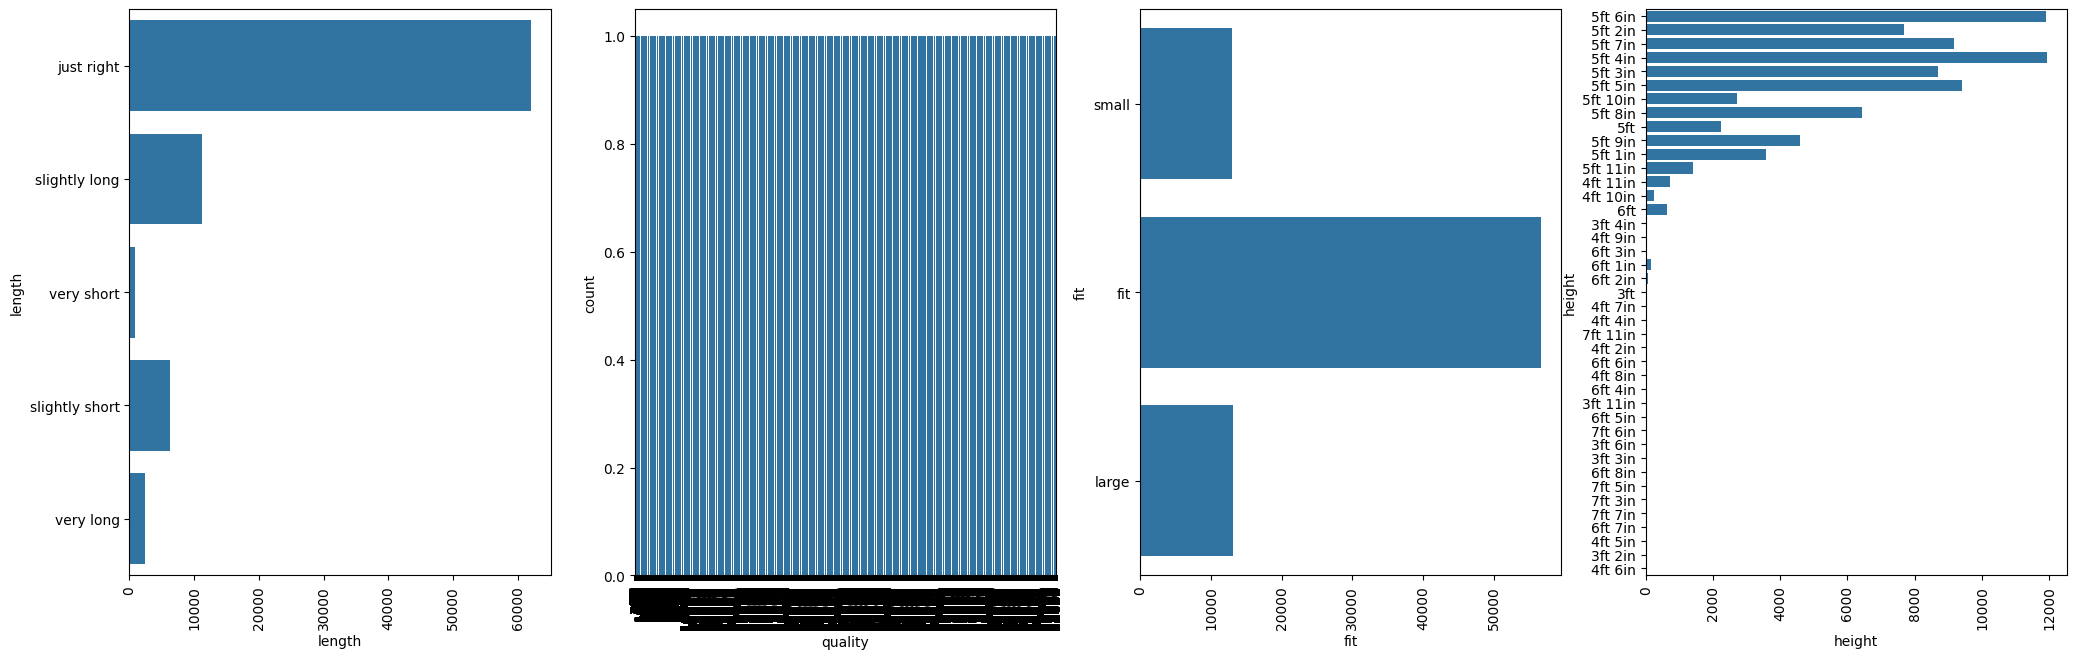

In [22]:
uniques_data = ['length','quality','fit','height']
countplot(uniques_data)

DATA PREPROCESSING

In [182]:
df = rtr_data.drop(columns=['cup size','user_name','category','user_id','review_text','review_summary','length','fit','shoe size','shoe width'])

In [5]:
def height_in_cms(ht):
  if ht.lower() != 'nan':
    ht = ht.replace('ft','').replace('in', '') #'5\' 8"'
    h_ft = int(ht.split()[0])
    if len(ht.split()) > 1:
      h_inch = int(ht.split()[1])
    else:
      h_inch = 0
    h_inch += h_ft * 12
    h_cm = int(h_inch * 2.54)
    return h_cm

In [184]:
df.height = df.height.astype(str).apply(height_in_cms)

In [185]:
df.height.fillna(value=df.height.mean(), inplace=True)
df.height.isnull().sum()

0

In [186]:
df.quality.fillna(value=df.quality.mean(), inplace=True)
df.quality.isnull().sum()

0

In [187]:
df['bust'] = pd.to_numeric(df['bust'], errors='coerce')
df.bust.fillna(value=df.bust.mean(), inplace=True)
df.bust.isnull().sum()

0

In [188]:
df.waist.fillna(value=df.waist.mean(), inplace=True)
df.waist.isnull().sum()

0

In [189]:
df.hips.fillna(value=df.hips.mean(), inplace=True)
df.hips.isnull().sum()

0

In [190]:
df["bra size"].fillna(value=df["bra size"].mean(), inplace=True)
df["bra size"].isnull().sum()

0

In [7]:
def qualitystr(r):
    global r1
    if r != 'NaN':
        r1=int(r)
    return r1

df.quality = df.quality.astype(int).apply(qualitystr)

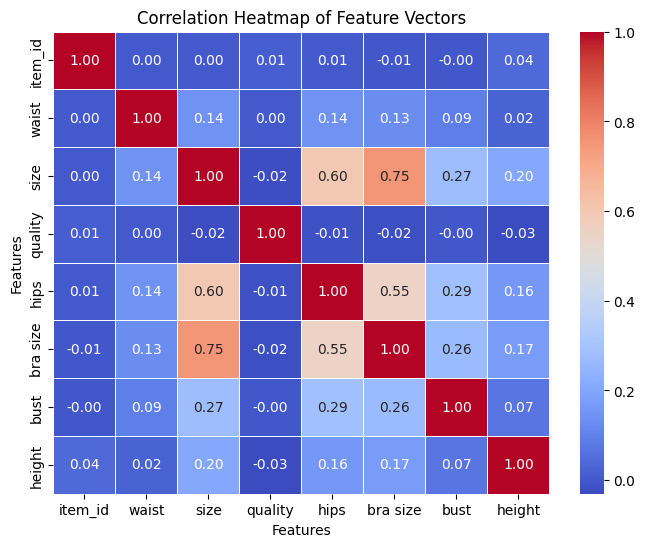

In [196]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add titles and labels for clarity
plt.title('Correlation Heatmap of Feature Vectors')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

Data Exploration

In [ ]:
df = rtr_data.drop(columns=['cup size','user_name','category','item_id','user_id','hips','shoe size','shoe width'])

In [123]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...


True

In [126]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame loading (replace with your data loading method)
# df = pd.read_csv('your_dataset.csv')

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'fit' column
df['fit_encoded'] = le.fit_transform(df['fit'])
# Calculating mean ratings for each fit category
mean_ratings = df.groupby('fit_encoded')['quality'].mean()

# Mapping back to original categories for better understanding
mean_ratings.index = le.inverse_transform(mean_ratings.index)

# Displaying the results
print(mean_ratings)

fit      4.083189
large    3.828668
small    3.482982
Name: quality, dtype: float64


In [127]:
# Function to clean text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove whitespace
    text = text.strip()
    
    return text

# Function to preprocess text
def preprocess_text(text):
    # Clean text
    text = clean_text(text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

In [128]:
df['review_text_processed'] = df['review_text'].astype(str).apply(preprocess_text)
df['review_summary_processed'] = df['review_summary'].astype(str).apply(preprocess_text)


In [132]:
# Assuming 'quality' is a column in your DataFrame 'df'
high_quality_reviews = df[df['quality'] > 4]['review_text_processed']
low_quality_reviews = df[df['quality'] <= 2]['review_text_processed']

In [133]:
from nltk import trigrams
from collections import Counter

# Function to generate trigrams from text
def generate_trigrams(text):
    trigrams_gen = trigrams(text.split())
    return [' '.join(trigram) for trigram in trigrams_gen]

# Generate trigrams for each subset
high_quality_trigrams = high_quality_reviews.apply(generate_trigrams).sum()
low_quality_trigrams = low_quality_reviews.apply(generate_trigrams).sum()

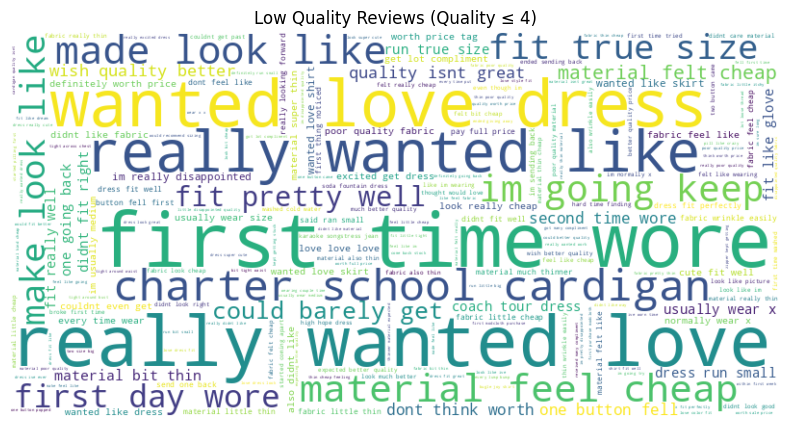

In [134]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create and display a word cloud
def create_wordcloud(trigrams_list, title):
    trigram_freq = Counter(trigrams_list)
    wordcloud = WordCloud(width=800, height=400, background_color='white')
    wordcloud.generate_from_frequencies(trigram_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Create and display word clouds
create_wordcloud(high_quality_trigrams, 'High Quality Reviews (Quality > 4)')
create_wordcloud(low_quality_trigrams, 'Low Quality Reviews (Quality ≤ 2)')

Classification Models

In [8]:

# Load data
df = rtr_data.drop(columns=['cup size','user_name','category','item_id','user_id','shoe size','shoe width','review_summary'])
df.height = df.height.astype(str).apply(height_in_cms)
df.height.fillna(value=df.height.mean(), inplace=True)
df["bra size"].fillna(value=df["bra size"].mean(), inplace=True)
df.hips.fillna(value=df.hips.mean(), inplace=True)
df['bust'] = pd.to_numeric(df['bust'], errors='coerce')
df.bust.fillna(value=df.bust.mean(), inplace=True)
df.quality.fillna(value=df.quality.mean(), inplace=True)
df.quality = df.quality.astype(int).apply(qualitystr)
df['review_text'] = df['review_text'].fillna('').astype(str)
# Preprocessing steps
numeric_features = ['size', 'hips', 'bra size', 'height']  # Add other numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['length', 'fit']  # Add other categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

text_features = 'review_text'  # Or 'review_summary'
text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000))])  # Adjust parameters as needed

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, text_features)])

# Split data into training and testing sets
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [14]:
# Create logistic regression pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse,mae)

c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       0.39      0.13      0.19       264
           2       0.44      0.19      0.27      1006
           3       0.41      0.34      0.37      3954
           4       0.40      0.37      0.39      5429
           5       0.51      0.66      0.58      5905

    accuracy                           0.45     16558
   macro avg       0.43      0.34      0.36     16558
weighted avg       0.44      0.45      0.44     16558

0.9970407053992028 0.6861335910134074


In [222]:
# Create KNeighborsClassifier pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier(n_neighbors=5))])
pipeline.fit(X_train, y_train)
# Predictions and evaluation
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse,mae)
#KNN_model = KNeighborsClassifier(n_neighbors=5)
# KNN_model.fit(X_train, y_train)
# KNN_prediction = KNN_model.predict(X_test)
# print("ACCURACY",accuracy_score(KNN_prediction, y_test))


              precision    recall  f1-score   support

           1       0.07      0.03      0.04       264
           2       0.11      0.08      0.09      1006
           3       0.28      0.33      0.30      3954
           4       0.34      0.38      0.36      5429
           5       0.41      0.34      0.37      5905

    accuracy                           0.33     16558
   macro avg       0.24      0.23      0.23     16558
weighted avg       0.33      0.33      0.33     16558

1.5881145065829207 0.9420219833313203


In [18]:
# Create DecisionTreeClassifier pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state = 0, max_depth = 6))])
pipeline.fit(X_train, y_train)
# Predictions and evaluation
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse,mae)
# DTC_model = DecisionTreeClassifier()
# DTC_model.fit(X_train, y_train)
# DTC_prediction = DTC_model.predict(X_test)
# print("ACCURACY",accuracy_score(DTC_prediction, y_test))

              precision    recall  f1-score   support

           1       0.41      0.07      0.12       264
           2       0.42      0.06      0.10      1006
           3       0.38      0.19      0.25      3954
           4       0.34      0.49      0.40      5429
           5       0.47      0.52      0.50      5905

    accuracy                           0.40     16558
   macro avg       0.40      0.27      0.27     16558
weighted avg       0.40      0.40      0.38     16558

1.1225389539799493 0.7606594999396062


Trying Regression Models

In [9]:
# Create logistic regression pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred = pipeline.predict(X_test)
#print(classification_report(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse,mae)

0.7238996853247476 0.6969813073780421


In [20]:
# Create DecisionTreeRegressor regression pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', DecisionTreeRegressor(random_state = 0, max_depth = 5))])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred = pipeline.predict(X_test)
#print(classification_report(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse,mae)

0.8728280451425111 0.763265120631523


In [21]:
# Create KNeighborsRegressor regression pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', KNeighborsRegressor(n_neighbors=4))])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred = pipeline.predict(X_test)
#print(classification_report(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse,mae)

1.1202477654306076 0.8532582437492451


In [23]:
# Create SVR regression pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVR())])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred = pipeline.predict(X_test)
#print(classification_report(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse,mae)